<a href="https://colab.research.google.com/github/VascoPiussa/thesis_code/blob/main/density_maps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GOOGLE DRIVE SETUP

# START

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


IMPORTS

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from google.colab import files

VARIABLES

In [ ]:
#XAMI-MIMIC dataset path, shortcut was added from shared with me to MyDrive
XAMI_PATH = "/content/drive/MyDrive/XAMI-MIMIC/XAMI-MIMIC/"
# Path to Eye Gaze's master_sheet.csv file. Datasets was added as a shortcut to MyDrive
EG_PATH = "/content/drive/MyDrive/Datasets/Eye-Gaze/"

# **REFLACX ANALYSIS**

AUX FUNCS

In [ ]:
"""
  Loops through all patients folders and retrieves all fixations coordinates from the gaze.csv file
  Input: mode ('silent' or 'report'), list of the timestamps of first word and dataframe
  Output: List
  Gets the timestamps of zthe first words
  Input: DataFrame
  Output: List
"""

def get_fixations_rx(df):
  stamp = -1
  fixations_silent = []
  fixations_report = []

  for idx, row in df.iterrows():
    # get the first word's timestamp
    d = pd.read_csv(XAMI_PATH + "patient_" + str(row['subject_id']) + "/REFLACX/" + str(row['id']) + "/timestamps_transcription.csv")
    stamp = d['timestamp_start_word'][0]

    # get the gaze file of that patient
    d2 = pd.read_csv(XAMI_PATH + "patient_" + str(row['subject_id']) + "/REFLACX/" + str(row['id']) + "/gaze.csv")
    df2 = pd.DataFrame(d2)

    for idx, row in df2.iterrows():
      if row['timestamp_sample'] < stamp:
        fixations_silent.append([row['x_position'], row['y_position']])
        #fixations_report.append([row['x_position'], row['y_position']])
      else:
        fixations_report.append([row['x_position'], row['y_position']])

  return fixations_silent, fixations_report

"""
  Creates a density map using the fixation coordinates provided
  Input: List, Figure Name (String)
  Output: None (However it produces a figure that is saved to a folder)
"""
def density_map_creator(df, fig_name):
  # make a dataset out of the (x,y) fixations pairs
  sns.set_style("white")
  # Custom the color, add shade and bandwidth
  sns.kdeplot(x=df.x_position, y=df.y_position, cmap="Reds").set(title=fig_name)
  plt.xlim([0,2544]) #size of the image
  plt.ylim([0,3056]) #size of the image
  plt.show()
  # saves figure
  #plt.savefig("/resources/data/" + fig_name + ".png")

REFLACX DATA ANALYSIS

In [ ]:
# use the metadata_updated.csv
data = pd.read_csv(XAMI_PATH + "spreadsheets/REFLACX/metadata_updated.csv")
rdf = pd.DataFrame(data)

# remove rows that contain discarded ET data
rdf = rdf.loc[rdf['eye_tracking_data_discarded'] == False]


# separate healthy and non healthy patients
# rdf is the reflacx metadata spreadsheet
rdf_healthy = rdf.loc[rdf['Total'] == 0]
rdf_unhealthy = rdf.loc[rdf['Total'] != 0]

#print(rdf.columns + "\n", str(rdf['id'][0]), "\n" + str(rdf.shape))
#fix_coor = gaze_csv_coordinates(rdf)
# change to read from file
#fixations = fix_coor
# write fixation list to a file to avoid running this again (1.5h)
#write_to_file(fix_coor, "fixations_reflacx_all_patients.txt")
# Create the density map of fixations for all
#density_map_creator(fix_coor, "fixations_reflacx_all")

In [ ]:
# REVISED CODE AFTER THE FRIDAY MEETING

# get timestamps of the first words from the reports
hs, hr = get_fixations_rx(rdf_healthy) # list
# only receiving us for memory purposes
us, ur = get_fixations_rx(rdf_unhealthy) # list

# load gaze coordinates lists into dataframes
hsdf = pd.DataFrame(hs, columns = ['x_position', 'y_position'])
hrdf = pd.DataFrame(hr, columns = ['x_position', 'y_position'])
usdf = pd.DataFrame(us, columns = ['x_position', 'y_position'])
urdf = pd.DataFrame(ur, columns = ['x_position', 'y_position'])

# save the eye coordinates x,y pairs csv files in Google Drive
#with open("/content/drive/MyDrive/ThesisWork/healthy_silent.csv", 'w') as f:
#  hsdf.to_csv(f)
#with open("/content/drive/MyDrive/ThesisWork/healthy_report.csv", 'w', encoding = "utf-8") as f:
  #hrdf.to_csv(f)
#with open("/content/drive/MyDrive/ThesisWork/unhealthy_silent.csv", 'w', encoding = "utf-8") as f:
  #usdf.to_csv(f)
#with open("/content/drive/MyDrive/ThesisWork/unhealthy_report.csv", 'w', encoding = "utf-8") as f:
  #urdf.to_csv(f)

# generate the fixations density maps
density_map_creator(hsdf, 'REFLACX Healthy Patients Silent Moment Density Map')

density_map_creator(hrdf, 'REFLACX Healthy Patients Report Moment Density Map')

density_map_creator(usdf, 'REFLACX Unhealthy Patients Silent Moment Density Map')

density_map_creator(urdf, 'REFLACX Unhealthy Patients Report Moment Density Map')

2081


VISUAL SEARCH PATTERNS ANALYSIS

In [ ]:
# In the first few hundred seconds, the global impression is formed, and the viewer is able to detect the most obvious perturbations.
# The idea here is to see if those gazes are mainly located in the abnormalities areas and define can then define a region of interest.

# Getting the first 300ms gazes and checking if any abornormalities are in said location, returning a percentage of how many where inside the bounding boxes
for idx, row in rdf_healthy.iterrows():




# **Eye Gaze Analysis**


AUX FUNCS

In [ ]:
def get_fixations_eg(df):
  stamp = -1
  fixations_silent = []
  fixations_report = []
  i = 0
  for idx, row in df.iterrows():
    i+= 1
    d = pd.read_json(XAMI_PATH + "patient_" + str(row['patient_id']) + "/EyeGaze/" + "/audio_segmentation_transcripts/" + str(row['dicom_id']) + "/transcript.json")
    if len(d['time_stamped_text']) > 0:
      stamp = d['time_stamped_text'][0]['begin_time']
    d2 = pd.read_csv(XAMI_PATH + "patient_" + str(row['patient_id']) + "/EyeGaze/" + "/gaze.csv")
    df2 = pd.DataFrame(d2)
    for idx,row in df2.iterrows():
      if row['Time (in secs)'] < stamp:
        fixations_silent.append([row['X_ORIGINAL'], row['Y_ORIGINAL']])
      else:
        fixations_report.append([row['X_ORIGINAL'], row['Y_ORIGINAL']])
  print(i)
  return fixations_silent, fixations_report

EYEGAZE DATA ANALYSIS

In [ ]:
# read master_sheet.csv
# use this one to separate by disease
data = pd.read_csv(EG_PATH + "master_sheet.csv")
msdf = pd.DataFrame(data)

# separate by disease
normaldf = msdf.loc[msdf['Normal'] == 1]
chfdf = msdf.loc[msdf['CHF'] == 1]
pneumoniadf = msdf.loc[msdf['pneumonia'] == 1]

# normal patients
""" ja correu
ns, nr = get_fixations_eg(normaldf)
print(len(ns), len(nr))
nsdf = pd.DataFrame(ns, columns=['x_position', 'y_position'])
nrdf = pd.DataFrame(nr, columns=['x_position', 'y_position'])
density_map_creator(nsdf, "EyeGaze Normal Patients Silent Moment Density Map")
density_map_creator(nrdf, "EyeGaze Normal Patients Report Moment Density Map")
"""

# CHF patients
chfs, chfr = get_fixations_eg(chfdf)
chfsdf = pd.DataFrame(chfs, columns=['x_position', 'y_position'])
chfrdf = pd.DataFrame(chfr, columns=['x_position', 'y_position'])
density_map_creator(chfsdf, "EyeGaze CHF Patients Silent Moment Density Map")
density_map_creator(chfrdf, "EyeGaze CHF Patients Report Moment Density Map")

# pneumonia patients
ps, pr = get_fixations_eg(pneumoniadf)
psdf = pd.DataFrame(ps, columns=['x_position', 'y_position'])
prdf = pd.DataFrame(pr, columns=['x_position', 'y_position'])
density_map_creator(psdf, "EyeGaze Pneumonia Patients Silent Moment Density Map")
density_map_creator(prdf, "EyeGaze Pneumonia Patients Report Moment Density Map")



# Final code

Index(['dicom_id', 'id', 'Total', 'timestamp_sample', 'x_position',
       'y_position', 'pupil_area_normalized', 'bbox_min', 'bbox_max',
       'bbox_all', 'has_lesion', 'Healthy'],
      dtype='object')


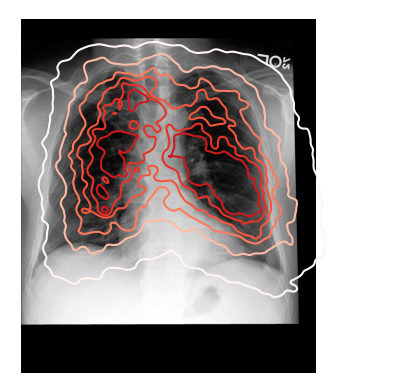

In [ ]:
from PIL import Image

csv_path = '/content/drive/MyDrive/ThesisWork/CSV/Gazes/'

sdf = pd.DataFrame(pd.read_pickle(csv_path + 'silent_gazes_lh9.pkl'))
rdf = pd.DataFrame(pd.read_pickle(csv_path + 'report_gazes_lh9.pkl'))
print(sdf.columns)
hs = sdf.loc[sdf.Healthy == True]
hr = rdf.loc[rdf.Healthy == True]
us = sdf.loc[sdf.Healthy == False]
ur = rdf.loc[rdf.Healthy == False]

img = Image.open('/content/drive/MyDrive/XAMI-MIMIC/XAMI-MIMIC/patient_10052926/CXR-JPG/s50472162/fcfb20b5-6b9561da-1e253a93-222fdaa8-e708200a.jpg')

def get_dm(df: pd.DataFrame, split: str) -> None:

    fig, ax = plt.subplots()
    ax.imshow(img, cmap='gray', vmin=0, vmax=255)
    sns.kdeplot(data=df[['x_position', 'y_position']], x='x_position', y='y_position', cmap="Reds", levels=7)
    plt.axis('off')
    plt.savefig('/content/drive/MyDrive/ThesisWork/CSV/Density Maps/' + split + '_cxr.jpg')
    plt.show()

# get_dm(hs, 'hs')
# get_dm(hr, 'hr')
# get_dm(us, 'us')
get_dm(ur, 'ur')